# NAME - GAURAV GUPTA
# ROLL NO. - 27
# BRANCH - SE AIML   DATE - 29/01/2026

# Experiment-2: Implementation of an End-to-End Machine Learning Data Pipeline.

In [16]:
!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [20]:
import seaborn as sns
# Load Titanic dataset
titanic_data = sns.load_dataset('titanic')

In [21]:
print(titanic_data.shape)

(891, 15)


In [22]:
print(titanic_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [23]:
print(titanic_data.head)

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [24]:
print(titanic_data.tail)

<bound method NDFrame.tail of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [25]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [26]:
print(titanic_data.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [27]:
missing_values = titanic_data.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [31]:
new_titanic_df = titanic_data.drop(columns=['deck'])

In [32]:
new_titanic_df['age'].fillna(new_titanic_df['age'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10568\3025612607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_titanic_df['age'].fillna(new_titanic_df['age'].median(), inplace=True)


In [33]:
missing_values = new_titanic_df.isnull().sum()
print(missing_values)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [34]:
data = new_titanic_df
data['embark_town'].dtype
data['embark_town'].unique()
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)
data.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_10568\3873381741.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [36]:
data = new_titanic_df
data['embarked'].dtype
data['embarked'].unique()
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
data.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_10568\2444084791.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [37]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['embarked'] = le.fit_transform(data['embarked'])

In [38]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,True


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    int64   
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(6), object(3)
memory usage: 79.4+ KB


In [40]:
data = data[['pclass','sex','age','fare','embarked','survived']]

x =  data[['pclass','sex','age','fare','embarked']]
y = data['survived']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [42]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
y_pred = model.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7947761194029851


In [45]:
new_passenger = pd.DataFrame({
    'pclass' : [3],
    'sex' : ['male'],
    'age' : [28],
    'fare' : [7.25],
    'embarked' : ['S']
})

In [48]:
new_passenger_encoded = pd.get_dummies(new_passenger)
new_passenger_encoded = new_passenger_encoded.reindex(columns=x.columns, fill_value=0)

In [49]:
prediction = model.predict(new_passenger_encoded)
print("Survived" if prediction[0] == 1 else "Did Not Survive")

Survived


In [52]:
new_passengers = pd.DataFrame({
      'pclass' : [1,3,2],
    'sex' : ['female','male','female'],
    'age' : [38,45,14],
    'fare' : [80.0,8.05,20.0],
    'embarked' : ['C','S','Q']
})

In [54]:
new_passengers_encoded = pd.get_dummies(new_passengers)
new_passengers_encoded = new_passengers_encoded.reindex(columns=x.columns, fill_value=0)

In [55]:
predictions = model.predict(new_passengers_encoded)

for i, pred in enumerate(predictions):
    print(f"Passenger {i+1}:",
          "Survived" if pred == 1 else "Did Not Survive")

Passenger 1: Survived
Passenger 2: Survived
Passenger 3: Survived


In [57]:
import numpy as np
data = titanic_data['fare']
mean = np.mean(data) 
std_dev = np.std(data) 
Z_scores = (data - mean) / std_dev 
outliers = data[np.abs(Z_scores) > 3] 

In [59]:
import pandas as pd
import numpy as np
titanic_df = sns.load_dataset('titanic')
# Outlier detection - 'Age'
mean_age = np.mean(titanic_df['age']) # calculates the mean
std_dev_age = np.std(titanic_df['age']) # calculates the standard deviation
Z_scores_age = (titanic_df['age'] - mean_age) / std_dev_age # computes the Z-scores
outliers_age = titanic_df['age'][np.abs(Z_scores_age) > 3] # finds all the data points that are 3 standard deviations away from the mean
print("Outliers in 'Age' using Z-score: \n", outliers_age)

# Outlier detection - 'Fare'
mean_fare = np.mean(titanic_df['fare']) # calculates the mean
std_dev_fare = np.std(titanic_df['fare']) # calculates the standard deviation
Z_scores_fare = (titanic_df['fare'] - mean_fare) / std_dev_fare # computes the Z-scores
outliers_fare = titanic_df['fare'][np.abs(Z_scores_fare) > 3] # finds all the data points that are 3 standard deviations away from the mean
print("\nOutliers in 'Fare' using Z-score: \n", outliers_fare) 

Outliers in 'Age' using Z-score: 
 630    80.0
851    74.0
Name: age, dtype: float64

Outliers in 'Fare' using Z-score: 
 27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: fare, dtype: float64


In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Drop missing values
age_data = titanic_df['age'].dropna()
fare_data = titanic_df['fare'].dropna()


In [61]:
# AGE
mean_age = np.mean(age_data)
std_dev_age = np.std(age_data)
z_scores_age = (age_data - mean_age) / std_dev_age
outliers_age = age_data[np.abs(z_scores_age) > 3]

# FARE
mean_fare = np.mean(fare_data)
std_dev_fare = np.std(fare_data)
z_scores_fare = (fare_data - mean_fare) / std_dev_fare
outliers_fare = fare_data[np.abs(z_scores_fare) > 3]


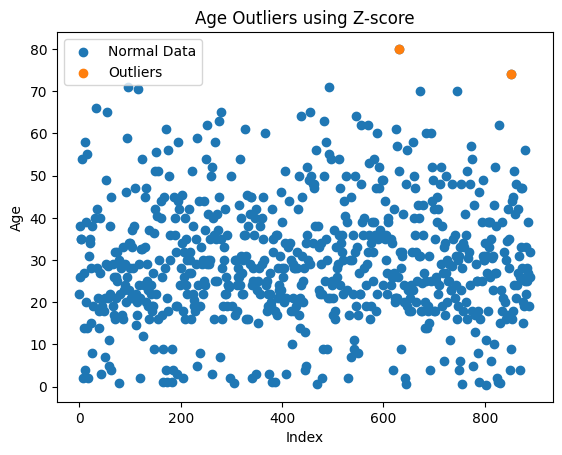

In [62]:
plt.figure()
plt.scatter(age_data.index, age_data, label='Normal Data')
plt.scatter(outliers_age.index, outliers_age, label='Outliers')
plt.title("Age Outliers using Z-score")
plt.xlabel("Index")
plt.ylabel("Age")
plt.legend()
plt.show()


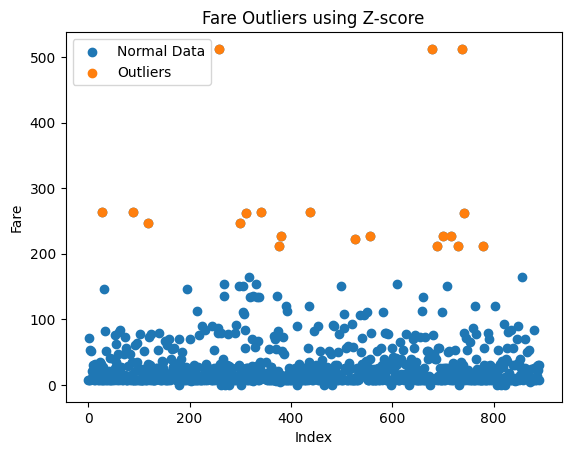

In [63]:
plt.figure()
plt.scatter(fare_data.index, fare_data, label='Normal Data')
plt.scatter(outliers_fare.index, outliers_fare, label='Outliers')
plt.title("Fare Outliers using Z-score")
plt.xlabel("Index")
plt.ylabel("Fare")
plt.legend()
plt.show()


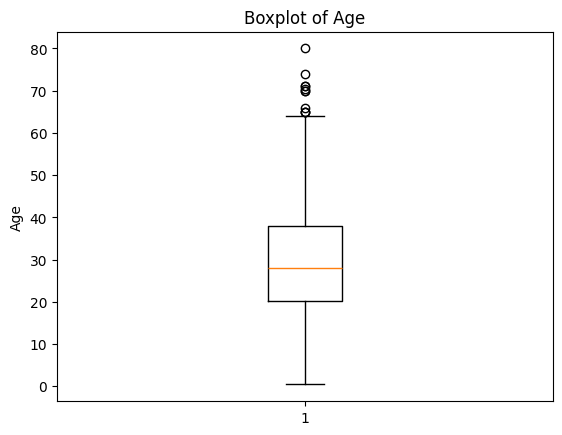

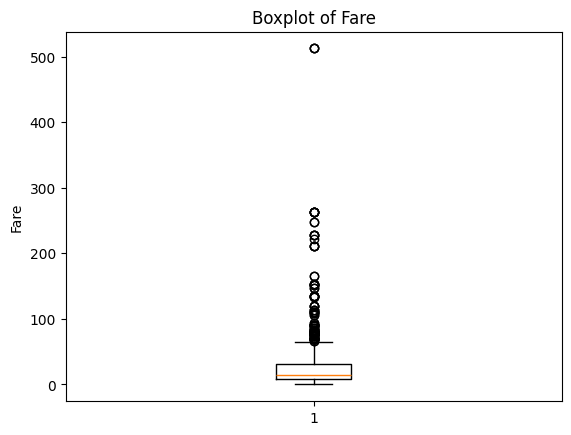

In [64]:
plt.figure()
plt.boxplot(age_data)
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()

plt.figure()
plt.boxplot(fare_data)
plt.title("Boxplot of Fare")
plt.ylabel("Fare")
plt.show()


In [65]:
# Min-Max Normalization for Age
age_min = age_data.min()
age_max = age_data.max()
age_minmax_norm = (age_data - age_min) / (age_max - age_min)

# Min-Max Normalization for Fare
fare_min = fare_data.min()
fare_max = fare_data.max()
fare_minmax_norm = (fare_data - fare_min) / (fare_max - fare_min)


In [66]:
# Z-score Normalization for Age
age_z_norm = (age_data - mean_age) / std_dev_age

# Z-score Normalization for Fare
fare_z_norm = (fare_data - mean_fare) / std_dev_fare


In [67]:
# Decimal Scaling for Age
j_age = np.ceil(np.log10(age_data.abs().max()))
age_decimal_norm = age_data / (10 ** j_age)

# Decimal Scaling for Fare
j_fare = np.ceil(np.log10(fare_data.abs().max()))
fare_decimal_norm = fare_data / (10 ** j_fare)


In [68]:
print(age_minmax_norm.min(), age_minmax_norm.max())
print(fare_minmax_norm.min(), fare_minmax_norm.max())


0.0 1.0
0.0 1.0
